# Прогнозирование цены

### Задача
Целевая переменная — `price`. У вас есть 4 атрибута, и, очевидно, мы хотим, чтобы вы построили некую модель машинного обучения, которая прогнозирует цены.

1. Проведите первоначальный анализ данных.
2. Используйте ML модель и кратко объясните свой выбор.
3. Покажите точность вашей модели и прокомментируйте результаты.
4. Представьте нам результаты и шаги, которые вы предприняли, а также некоторые критические размышления.
5. Визуализируйте на графиках точность модели, важность признаков и корреляцию признаков с ценой.  

### Описание данных
Данные представлены в файле `price_sample.csv`.

### Комментарии

Определите, обучите и оцените прогнозирующую модель, которая принимает в качестве входных данных предоставленные данные. По вашему усмотрению вы можете разделить данные на наборы для обучения, тестирования. 

Убедитесь, что решение отражает весь ваш мыслительный процесс (для каждой ячейки кода оставляйте комментарии, иначе мы не поймем, что вы хотели сделать)

### Что мы точно хотим увидеть в вашей работе?

1. **Анализ данных**: Проведение первичного анализа данных для понимания их структуры и основных характеристик. 

2. **Обработка данных**: Это критически важный шаг, который включает в себя очистку данных, обработку пропущенных значений и дубликатов.

3. **Оценка модели**: Обучение и тестирование подходящей модели и оценка ее производительности с использованием релевантных метрик.

4. **Визуализация**: Постройте графики, которые покажут точность модели, важность признаков и корреляцию признаков с ценой. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Загружаем данные
df = pd.read_csv("price_sample.csv")

# Первичный анализ данных
print('Информация о данных:')
print(df.info())
print('\nПервые строки:')
print(df.head())
print('\nСтатистика:')
print(df.describe())
print('\nПропуски:')
print(df.isnull().sum())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   para1   10003 non-null  int64  
 1   para2   9997 non-null   float64
 2   para3   10003 non-null  float64
 3   para4   9998 non-null   float64
 4   price   10003 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.9 KB
None

Первые строки:
   para1  para2    para3  para4   price
0      1  662.0   3000.0    3.8   73.49
1      1  340.0   2760.0    9.2  300.00
2      0   16.0   2700.0    3.0  130.00
3      1   17.0  12320.0    6.4  365.00
4      1  610.0   2117.0   10.8  357.50

Статистика:
              para1        para2         para3        para4         price
count  10003.000000  9997.000000  10003.000000  9998.000000  10003.000000
mean       1.380986   447.270681   9547.975527     8.458024    433.774924
std        3.500408   220.913801   8022.286943     4.613645    2

In [3]:
# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop("price", axis=1)
y = df["price"]

# Заполняем пропуски медианой 
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Метрики
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name}:")
    print(f"  MSE = {mse:.2f}")
    print(f"  MAE = {mae:.2f}")
    print(f"  R²  = {r2:.4f}")
    return mse, mae, r2

rf_mse, rf_mae, rf_r2 = evaluate_model("Random Forest", y_test, rf_pred)
lr_mse, lr_mae, lr_r2 = evaluate_model("Linear Regression", y_test, lr_pred)


Random Forest:
  MSE = 27980.87
  MAE = 100.52
  R²  = 0.6795

Linear Regression:
  MSE = 39715.30
  MAE = 121.05
  R²  = 0.5451


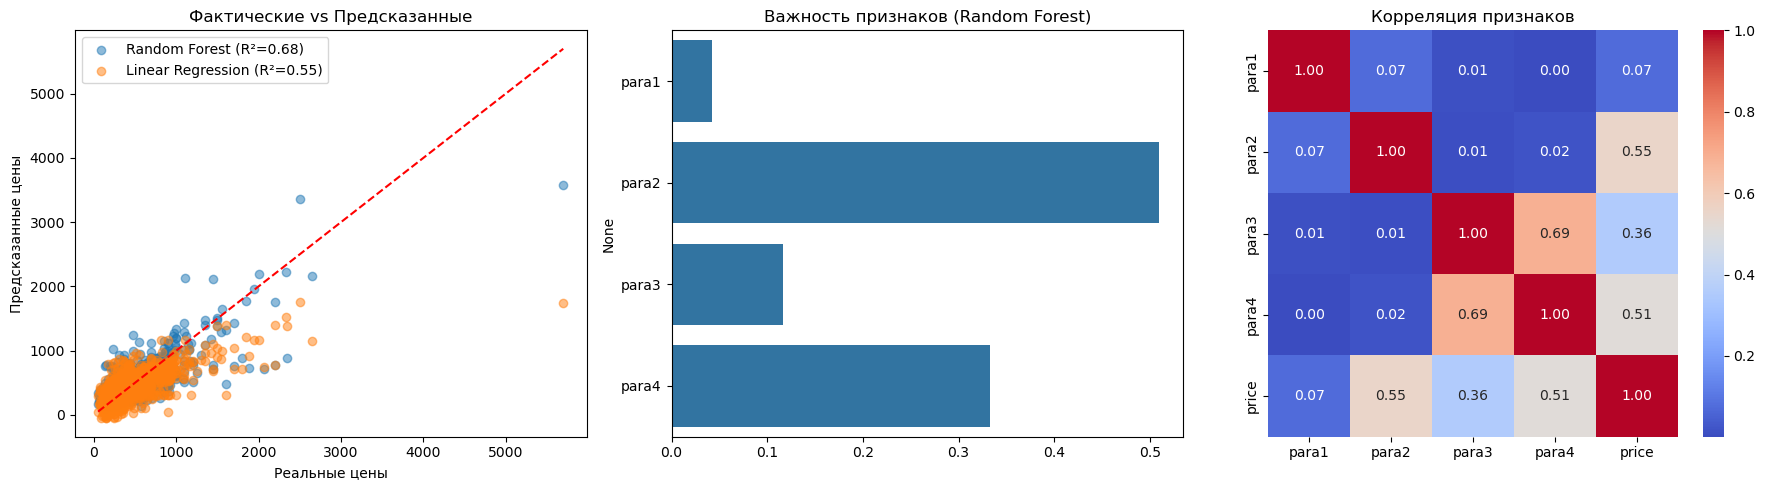

In [4]:
# Визуализации 
plt.figure(figsize=(18,5))

# (1) Фактические vs Предсказанные (сравнение 2 моделей)
plt.subplot(1,3,1)
plt.scatter(y_test, rf_pred, alpha=0.5, label=f"Random Forest (R²={rf_r2:.2f})")
plt.scatter(y_test, lr_pred, alpha=0.5, label=f"Linear Regression (R²={lr_r2:.2f})")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Реальные цены")
plt.ylabel("Предсказанные цены")
plt.title("Фактические vs Предсказанные")
plt.legend()

# (2) Важность признаков (только для RF)
plt.subplot(1,3,2)
feature_names = df.drop("price", axis=1).columns
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=feature_names)
plt.title("Важность признаков (Random Forest)")

# (3) Корреляция признаков
plt.subplot(1,3,3)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")

plt.tight_layout()
plt.show()

Линейная регрессия служит хорошей базовой моделью, но её возможности
ограничены — особенно если данные содержат нелинейные зависимости.

Random Forest показал лучшие результаты, поэтому его можно использовать как 
основную модель. Он хорошо работает с табличными данными, учитывает нелинейные зависимости,
устойчив к выбросам и автоматически оценивает важность признаков.

Random Forest оказался более подходящей моделью для данной задачи прогнозирования 
цен, что подтверждается как метриками, так и визуализациями.